In [108]:
import numpy as np
from scipy import ndimage, misc
import imageio
import itertools
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, Flatten, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

classes = ['dog', 'cat']

In [90]:
generator = ImageDataGenerator(
                            rotation_range=15, 
                            horizontal_flip=True,
                            #vertical_flip=True, 
                            width_shift_range=0.1, 
                            height_shift_range=0.1, 
                            zoom_range=0.2,
                            channel_shift_range=50)

In [99]:
train_batches = generator.flow_from_directory(train_path, target_size=(244, 244), classes=classes, batch_size=5)
valid_batches = generator.flow_from_directory(valid_path, target_size=(244, 244), classes=classes, batch_size=2)
test_batches = generator.flow_from_directory(test_path, target_size=(244, 244), classes=classes, batch_size=2)

Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [100]:
print(len(train_batches))
print(len(valid_batches))
print(len(test_batches))

20
10
10


<b>TEST CODE</b><br></br>
<h>Testing differnt types of Data Augmentations</h><br></br>
<h>Leave them commented out if you dont want to test</h>

In [43]:
#generator1 = ImageDataGenerator(rotation_range=5)
#generator2 = ImageDataGenerator(rotation_range=180, horizontal_flip=True)

In [91]:
#train_gen1 = generator1.flow_from_directory(train_path, target_size=(244, 244), classes=classes, batch_size=5)
#train_gen2 = generator.flow_from_directory(train_path, target_size=(244, 244), classes=classes, batch_size=5)

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [45]:
#len(train_gen1)

20

In [126]:
#function to plot images with labels in jupyter notebook
def plot(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose(0,2,3,1)
            
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none') 
            

In [115]:
#abc = [next(train_gen1)[0] for i in range(10)]
#image_path = 'train//dog//35.jpg'
#image = np.expand_dims(imageio.imread(image_path), 0)
#aug_image = generator.flow(image)

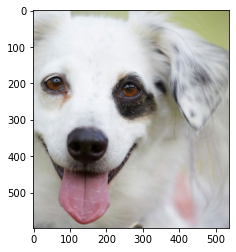

In [80]:
#plt.imshow(image[0])

In [93]:
#abc1 = [next(aug_image)[0] for i in range(10)]
#abc2 = [next(train_gen2)[0][0] for i in range(50)]

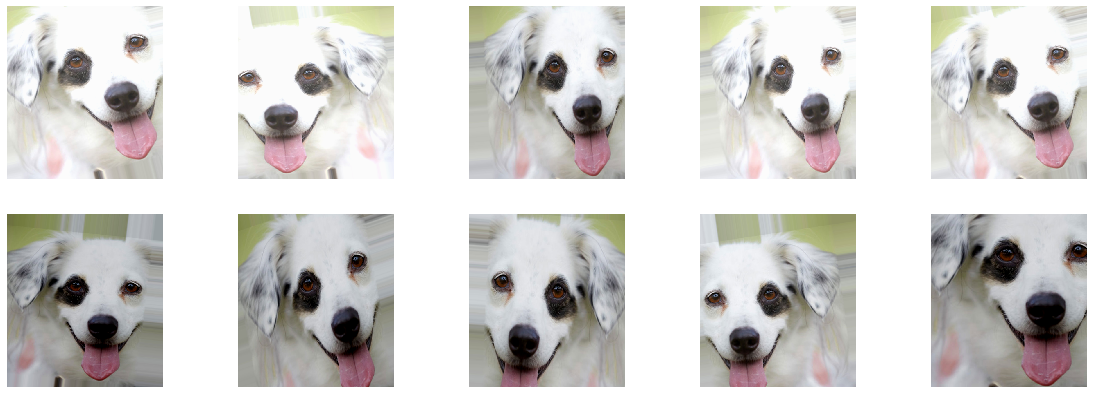

In [94]:
#plot(abc1, figsize=(20, 7), rows=2)

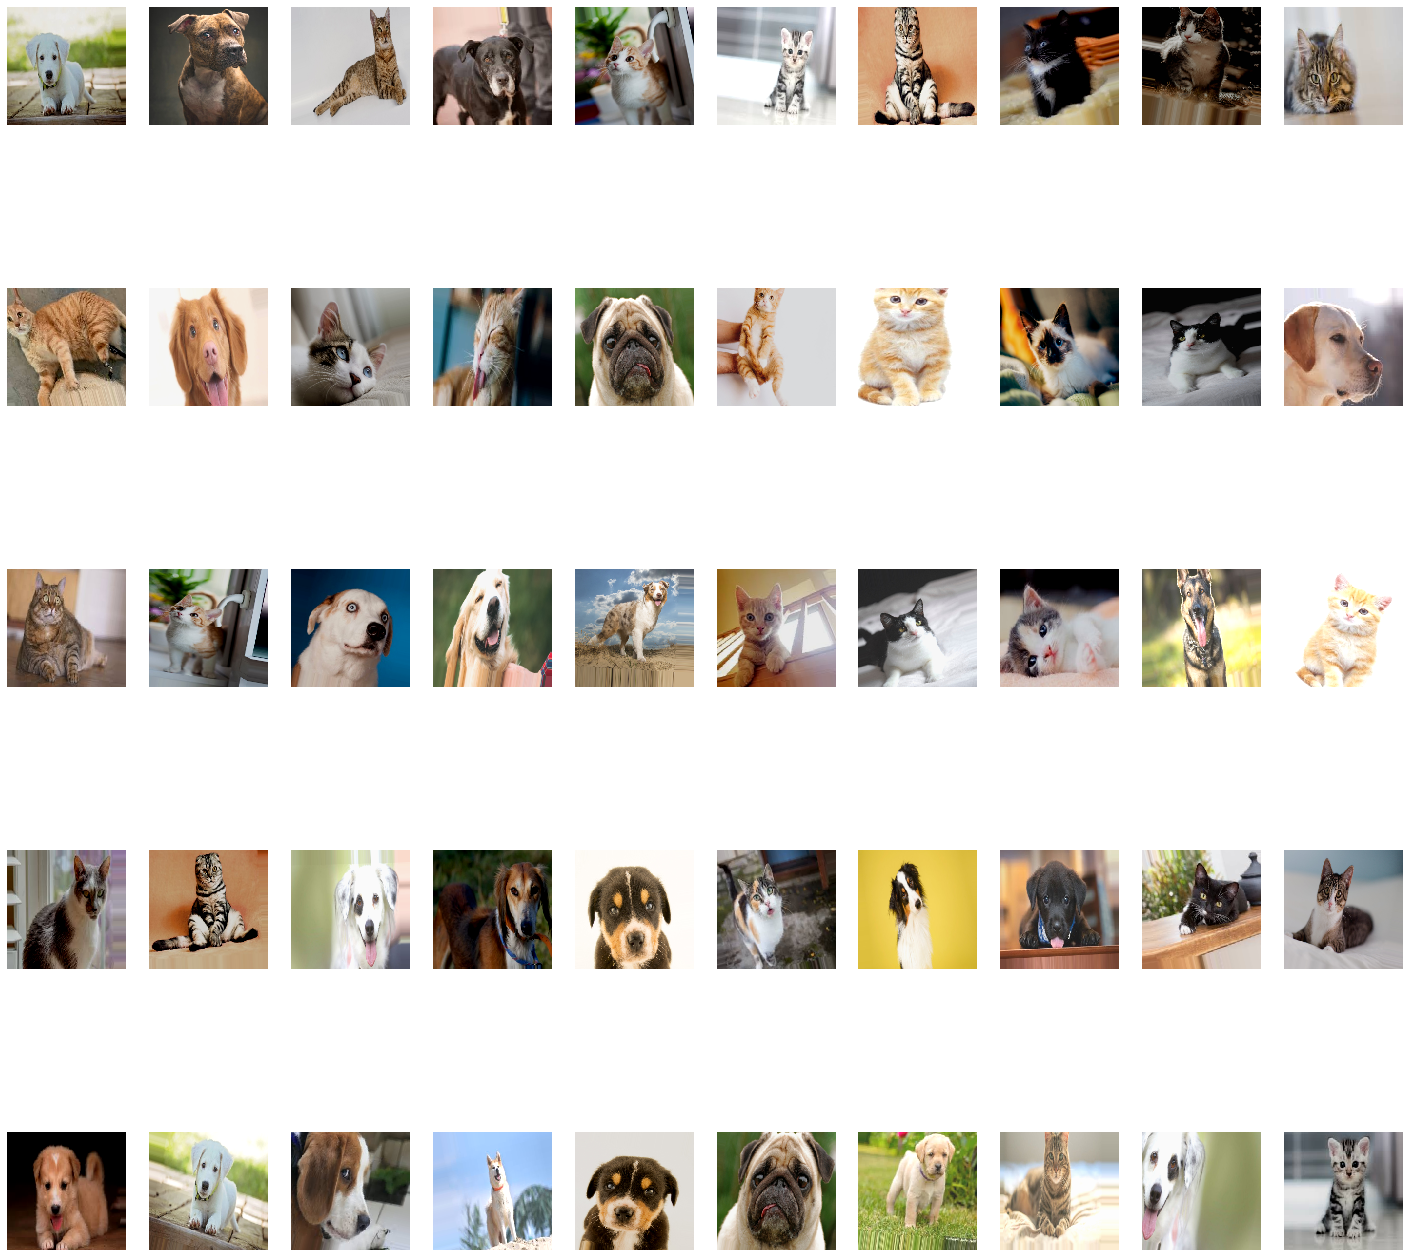

In [95]:
#plot(abc2, figsize=(25, 25), rows=5)

<b>Creating the Model</b>

In [111]:
model = Sequential([
    Conv2D(5, kernel_size=(3, 3), input_shape=(244, 244, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='valid'),
    Conv2D(10, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='valid'),
    Conv2D(15, kernel_size=(3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [112]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 244, 244, 5)       140       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 122, 122, 5)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 10)      460       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 61, 61, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 15)        1365      
_________________________________________________________________
flatten_1 (Flatten)          (None, 55815)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [113]:
model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [120]:
model.fit_generator(train_batches, steps_per_epoch=20, epochs=10,
                   validation_data=valid_batches, validation_steps=5, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 5 steps
Epoch 1/10
20/20 - 4s - loss: 1.1660 - accuracy: 0.7100 - val_loss: 0.7699 - val_accuracy: 0.7000
Epoch 2/10
20/20 - 4s - loss: 0.7456 - accuracy: 0.7300 - val_loss: 1.2558 - val_accuracy: 0.5000
Epoch 3/10
20/20 - 4s - loss: 0.8033 - accuracy: 0.8100 - val_loss: 0.5879 - val_accuracy: 0.7000
Epoch 4/10
20/20 - 4s - loss: 1.3695 - accuracy: 0.6900 - val_loss: 1.2578 - val_accuracy: 0.5000
Epoch 5/10
20/20 - 4s - loss: 1.4412 - accuracy: 0.7000 - val_loss: 2.0916 - val_accuracy: 0.6000
Epoch 6/10
20/20 - 5s - loss: 0.7575 - accuracy: 0.7200 - val_loss: 1.2664 - val_accuracy: 0.5000
Epoch 7/10
20/20 - 4s - loss: 0.7499 - accuracy: 0.7600 - val_loss: 1.2440 - val_accuracy: 0.5000
Epoch 8/10
20/20 - 4s - loss: 0.9803 - accuracy: 0.7100 - val_loss: 0.9349 - val_accuracy: 0.7000
Epoch 9/10
20/20 - 4s - loss: 0.6659 - accuracy: 0.7900 - val_loss: 1.5380 - val_accuracy: 0.5000
Epoch 10/10
20/20 - 4s - lo

In [121]:
model.save('TestCNN1.h5')

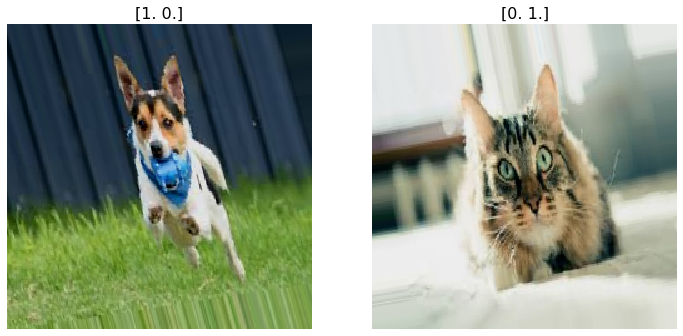

In [131]:
test_imgs, test_labels = next(test_batches)
plot(test_imgs, titles=test_labels)

In [132]:
#predictions = model.predict_generator(test_batches, steps=5, verbose=0)